In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings 
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('heart.csv')

In [4]:
df.head()

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [6]:
df.describe()

Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  918.000000  918.000000   918.000000  918.000000  918.000000   
mean    53.510893  132.396514   198.799564    0.233115  136.809368   
std      9.432617   18.514154   109.384145    0.423046   25.460334   
min     28.000000    0.000000     0.000000    0.000000   60.000000   
25%     47.000000  120.000000   173.250000    0.000000  120.000000   
50%     54.000000  130.000000   223.000000    0.000000  138.000000   
75%     60.000000  140.000000   267.000000    0.000000  156.000000   
max     77.000000  200.000000   603.000000    1.000000  202.000000   

          Oldpeak  HeartDisease  
count  918.000000    918.000000  
mean     0.887364      0.553377  
std      1.066570      0.497414  
min     -2.600000      0.000000  
25%      0.000000      0.000000  
50%      0.600000      1.000000  
75%      1.500000      1.000000  
max      6.200000      1.000000

In [7]:
df.duplicated().sum()

np.int64(0)

<Axes: xlabel='HeartDisease'>

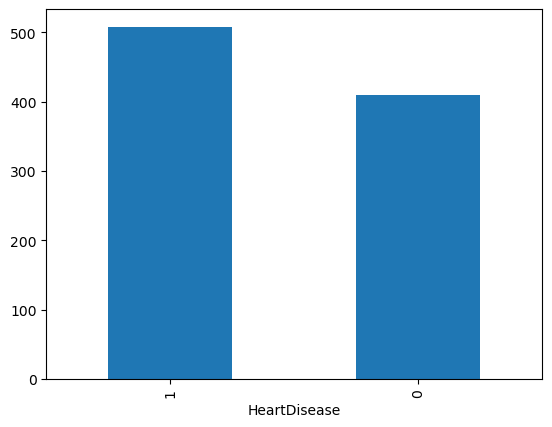

In [8]:
df['HeartDisease'].value_counts().plot(kind='bar')

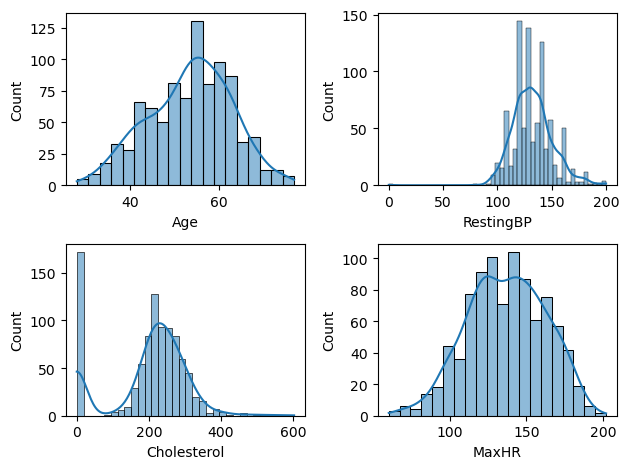

In [9]:
def plotting(var,num):
    plt.subplot(2,2,num)
    sns.histplot(df[var],kde=True)

plotting('Age',1)
plotting('RestingBP',2)
plotting('Cholesterol',3)
plotting('MaxHR',4)

plt.tight_layout()

In [10]:
df['Cholesterol'].value_counts()

Cholesterol
0      172
254     11
220     10
223     10
204      9
      ... 
353      1
278      1
157      1
176      1
131      1
Name: count, Length: 222, dtype: int64

In [11]:
ch_mean=df.loc[df['Cholesterol'] != 0, 'Cholesterol'].mean()     

In [12]:
ch_mean

np.float64(244.6353887399464)

In [13]:
df['Cholesterol']=df['Cholesterol'].replace(0,ch_mean)
df['Cholesterol']=df['Cholesterol'].round(2)

In [14]:
resting_bp_mean=df.loc[df['RestingBP'] != 0, 'RestingBP'].mean()
df['RestingBP']=df['RestingBP'].replace(0,resting_bp_mean)
df['RestingBP']=df['RestingBP'].round(2)

<Axes: xlabel='Sex', ylabel='count'>

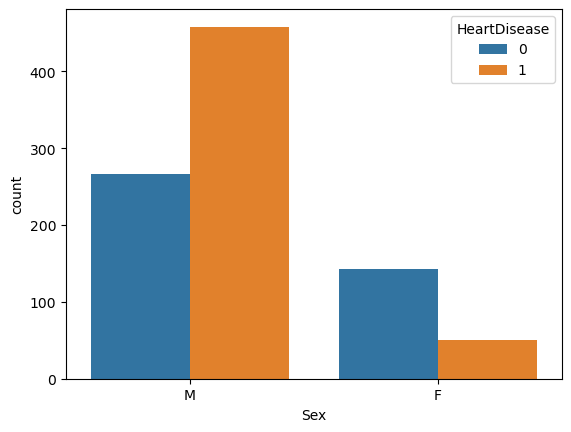

In [15]:
sns.countplot(x=df['Sex'],hue=df['HeartDisease'])

<Axes: xlabel='Cholesterol'>

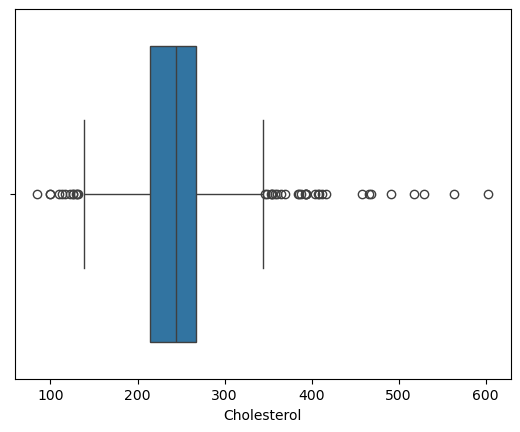

In [16]:
sns.boxplot(x='Cholesterol',data=df)

<Axes: xlabel='ChestPainType', ylabel='count'>

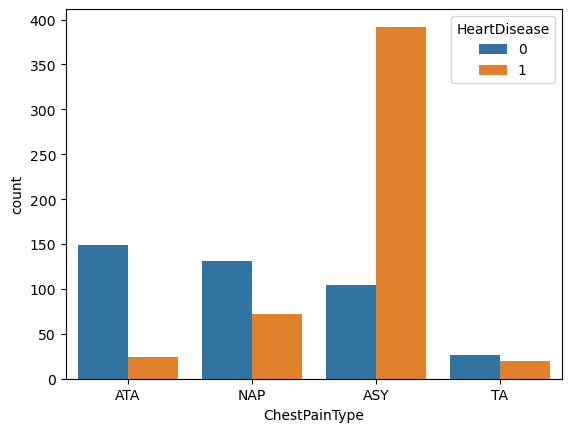

In [17]:
sns.countplot(x=df['ChestPainType'],hue=df['HeartDisease'])

<Axes: xlabel='HeartDisease', ylabel='Cholesterol'>

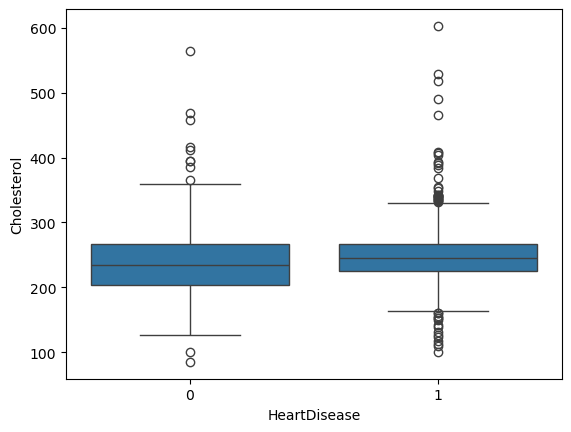

In [18]:
sns.boxplot( x='HeartDisease',y='Cholesterol',data=df)

<Axes: >

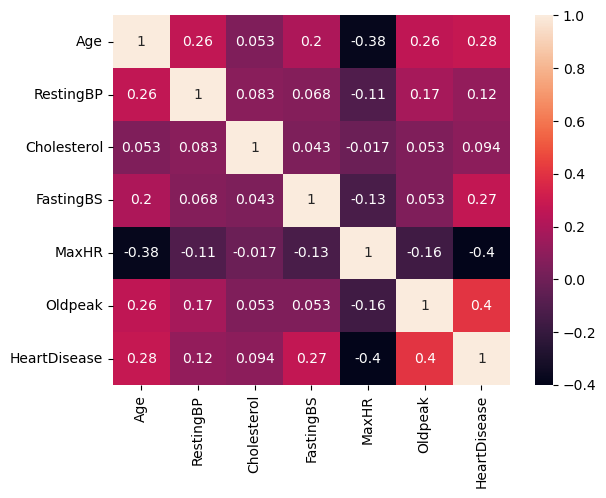

In [19]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

# Data preprocessing and cleaning

In [20]:
df_encode=pd.get_dummies(df,drop_first=True)

In [21]:
df1=df_encode.astype(int)

In [22]:
df1

Age  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak  HeartDisease  \
0     40        140          289          0    172        0             0   
1     49        160          180          0    156        1             1   
2     37        130          283          0     98        0             0   
3     48        138          214          0    108        1             1   
4     54        150          195          0    122        0             0   
..   ...        ...          ...        ...    ...      ...           ...   
913   45        110          264          0    132        1             1   
914   68        144          193          1    141        3             1   
915   57        130          131          0    115        1             1   
916   57        130          236          0    174        0             1   
917   38        138          175          0    173        0             0   

     Sex_M  ChestPainType_ATA  ChestPainType_NAP  ChestPainType_TA  \
0        1                  1                  0                 0   
1        0                  0                  1                 0   
2        1                  1                  0                 0   
3        0                  0                  0                 0   
4        1                  0                  1                 0   
..     ...                ...                ...               ...   
913      1                  0                  0                 1   
914      1                  0                  0                 0   
915      1                  0                  0                 0   
916      0                  1                  0                 0   
917      1                  0                  1                 0   

     RestingECG_Normal  RestingECG_ST  ExerciseAngina_Y  ST_Slope_Flat  \
0                    1              0                 0              0   
1                    1              0                 0              1   
2                    0              1                 0              0   
3                    1              0                 1              1   
4                    1              0                 0              0   
..                 ...            ...               ...            ...   
913                  1              0                 0              1   
914                  1              0                 0              1   
915                  1              0                 1              1   
916                  0              0                 0              1   
917                  1              0                 0              0   

     ST_Slope_Up  
0              1  
1              0  
2              1  
3              0  
4              1  
..           ...  
913            0  
914            0  
915            0  
916            0  
917            1  

[918 rows x 16 columns]

In [23]:
df1.columns

Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'HeartDisease', 'Sex_M', 'ChestPainType_ATA', 'ChestPainType_NAP',
       'ChestPainType_TA', 'RestingECG_Normal', 'RestingECG_ST',
       'ExerciseAngina_Y', 'ST_Slope_Flat', 'ST_Slope_Up'],
      dtype='object')

In [36]:
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [37]:
X=df1.drop('HeartDisease',axis=1)
y=df1['HeartDisease']

In [38]:
X

Age  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak  Sex_M  \
0     40        140          289          0    172        0      1   
1     49        160          180          0    156        1      0   
2     37        130          283          0     98        0      1   
3     48        138          214          0    108        1      0   
4     54        150          195          0    122        0      1   
..   ...        ...          ...        ...    ...      ...    ...   
913   45        110          264          0    132        1      1   
914   68        144          193          1    141        3      1   
915   57        130          131          0    115        1      1   
916   57        130          236          0    174        0      0   
917   38        138          175          0    173        0      1   

     ChestPainType_ATA  ChestPainType_NAP  ChestPainType_TA  \
0                    1                  0                 0   
1                    0                  1                 0   
2                    1                  0                 0   
3                    0                  0                 0   
4                    0                  1                 0   
..                 ...                ...               ...   
913                  0                  0                 1   
914                  0                  0                 0   
915                  0                  0                 0   
916                  1                  0                 0   
917                  0                  1                 0   

     RestingECG_Normal  RestingECG_ST  ExerciseAngina_Y  ST_Slope_Flat  \
0                    1              0                 0              0   
1                    1              0                 0              1   
2                    0              1                 0              0   
3                    1              0                 1              1   
4                    1              0                 0              0   
..                 ...            ...               ...            ...   
913                  1              0                 0              1   
914                  1              0                 0              1   
915                  1              0                 1              1   
916                  0              0                 0              1   
917                  1              0                 0              0   

     ST_Slope_Up  
0              1  
1              0  
2              1  
3              0  
4              1  
..           ...  
913            0  
914            0  
915            0  
916            0  
917            1  

[918 rows x 15 columns]

In [39]:
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.2, random_state=42)

In [40]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [41]:
models={
    "Logistic Regression" : LogisticRegression(),
    "KNN" : KNeighborsClassifier(),
    "Naive Bayes" : GaussianNB(),
    "Decision tree": DecisionTreeClassifier(),
    "SVM" : SVC()
}

In [42]:
result=[]

In [43]:
for name,model in models.items():
    model.fit(X_train_scaled,y_train)
    y_pred=model.predict(X_test_scaled)
    acc=accuracy_score(y_test,y_pred)
    f1=f1_score(y_test,y_pred)
    result.append({
        'model': name,
        'Accuracy': round(acc,4),
        'f1 score': round(f1,4)
    })

In [44]:
result

[{'model': 'Logistic Regression', 'Accuracy': 0.8696, 'f1 score': 0.8846},
 {'model': 'KNN', 'Accuracy': 0.8641, 'f1 score': 0.8815},
 {'model': 'Naive Bayes', 'Accuracy': 0.8478, 'f1 score': 0.8614},
 {'model': 'Decision tree', 'Accuracy': 0.8043, 'f1 score': 0.82},
 {'model': 'SVM', 'Accuracy': 0.8478, 'f1 score': 0.8667}]

In [45]:
import joblib 
joblib.dump(models['Logistic Regression'],'Logistic Regression_heart.pkl')
joblib.dump(scaler,'scaler.pkl')
joblib.dump(X.columns.tolist(),'columns.pkl')

['columns.pkl']